In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('train (2).csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Изучили таблицу на предмет заполненности в каждом столбце для понимания возможности использования их для анализа. В результате получилось, что все столбцы заполнены более чем на 80%, кроме одного - "Cabin(каюты)". Соответсвенно данный столбец не будет использован для изучения.

# Для начала найдем соотношение погибших и выживших пассажиров(где 0 - погибшие, 1 - выжившие).

In [7]:
data1 = data.Survived.value_counts(normalize=True).mul(100).round(2).reset_index()

In [8]:
data1

,index,Survived
0,0,61.62
1,1,38.38


<AxesSubplot:xlabel='index', ylabel='Survived'>

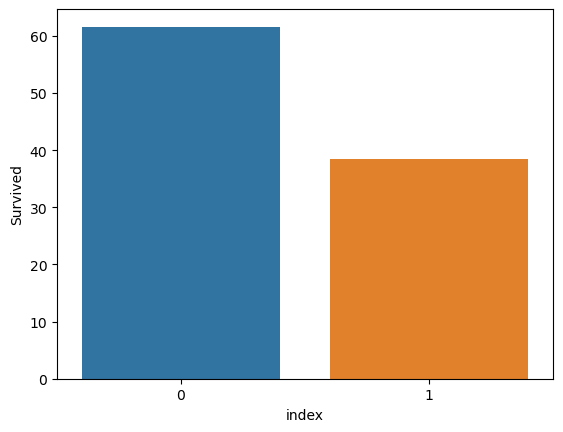

In [9]:
sns.barplot(data = data1, x='index', y='Survived')

Среди выживших найдем количество по каждому классу.

In [30]:
data.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).round(2)

Pclass  Survived
1       1           62.96
        0           37.04
2       0           52.72
        1           47.28
3       0           75.76
        1           24.24
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

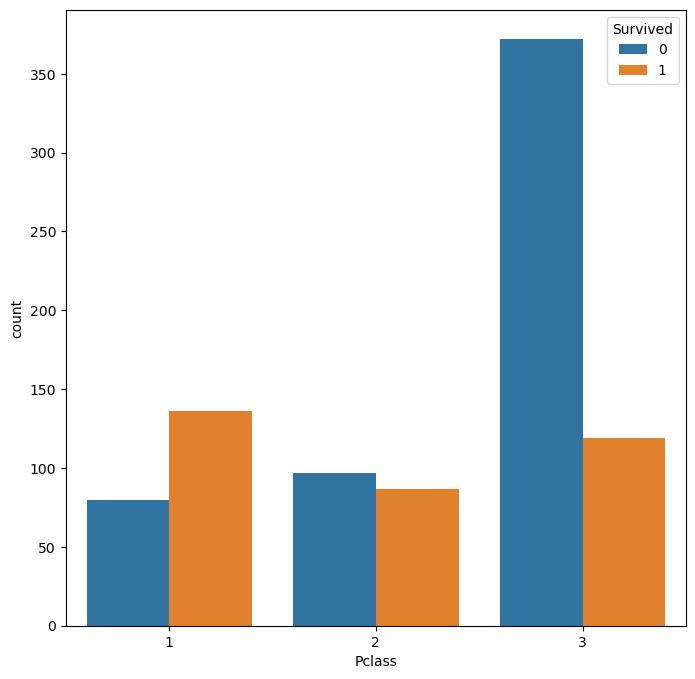

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(x=data.Pclass, hue=data.Survived)

In [ ]:
Из таблицы и графика видим, что пассажиров первого класса спаслось большее количество, нежели второго или третьего.

In [10]:
data.Fare.value_counts().sort_index(ascending=False)

512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
            ..
6.4375       1
6.2375       1
5.0000       1
4.0125       1
0.0000      15
Name: Fare, Length: 248, dtype: int64

In [17]:
data2 = pd.cut(data['Fare'], bins=8).value_counts().reset_index().rename(columns={"index":"PriceSegments"})

In [18]:
data2

,PriceSegments,Fare
0,"(-0.512, 64.041]",773
1,"(64.041, 128.082]",80
2,"(128.082, 192.123]",18
3,"(192.123, 256.165]",11
4,"(256.165, 320.206]",6
5,"(448.288, 512.329]",3
6,"(320.206, 384.247]",0
7,"(384.247, 448.288]",0


In [67]:
data22 = pd.DataFrame({'Fare': ['(-0.512, 64.041]', '(64.041, 128.082]', '(128.082, 192.123]',
                                   '(192.123, 256.165]', '(256.165, 320.206]', '(448.288, 512.329]'],
                          'PriceSegments': [773, 80, 18, 11, 6, 
                                                  3]})
explode = [0.3,0.3,0.3,0.3,0.3,0.3]

<AxesSubplot:ylabel='PriceSegments'>

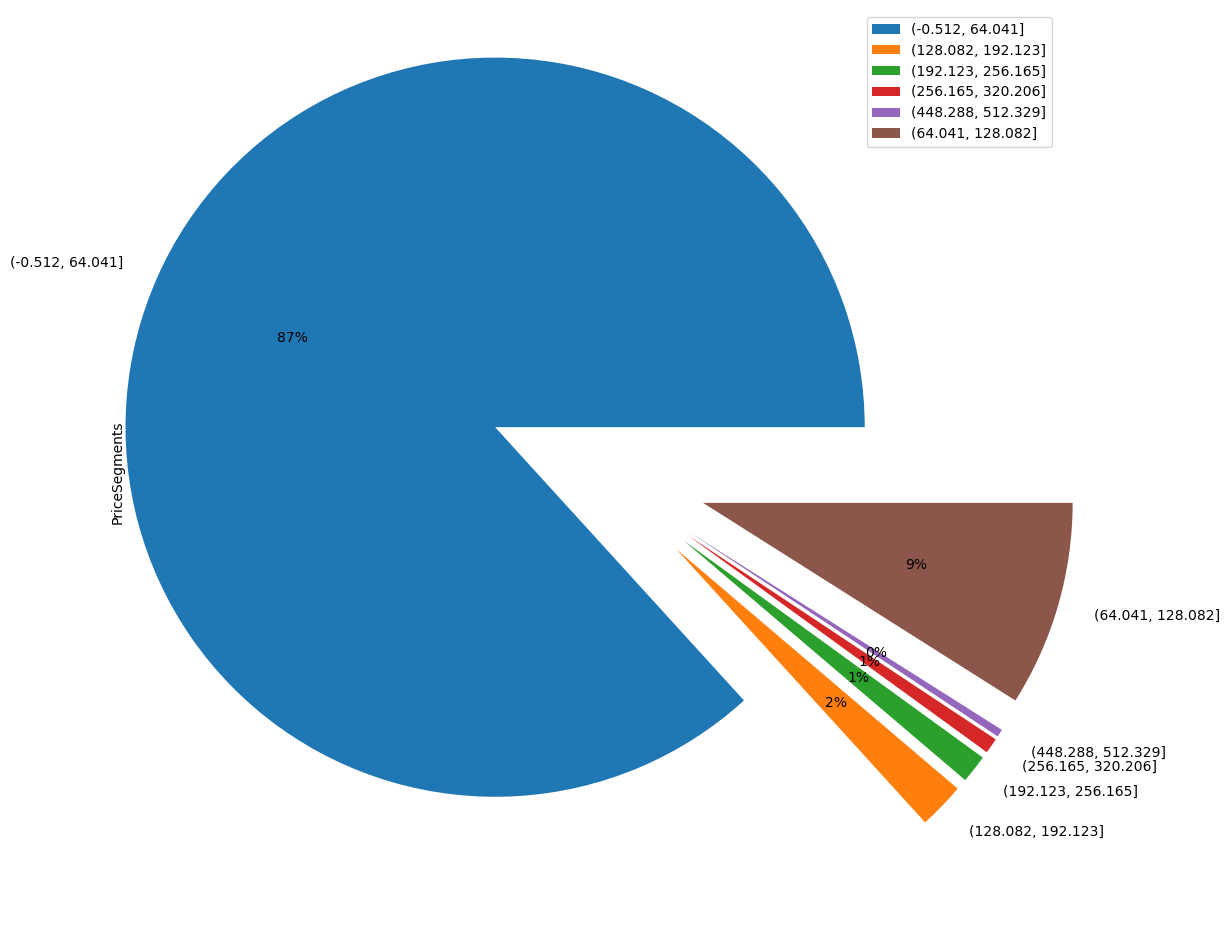

In [68]:
data22.groupby(['Fare']).sum().plot(kind='pie', figsize=(12,12), y='PriceSegments', autopct='%1.0f%%', explode=explode)

Разбили пассажиров на группы по критерию цены на билет. 

## Проведем анализ на предмет соотношения погибших и выживших пассажиров по каждому порту отправления.

In [36]:
harbor = data.groupby('Embarked')['Survived'].value_counts(normalize=True).mul(100).round(2)

In [37]:
harbor

Embarked  Survived
C         1           55.36
          0           44.64
Q         0           61.04
          1           38.96
S         0           66.30
          1           33.70
Name: Survived, dtype: float64

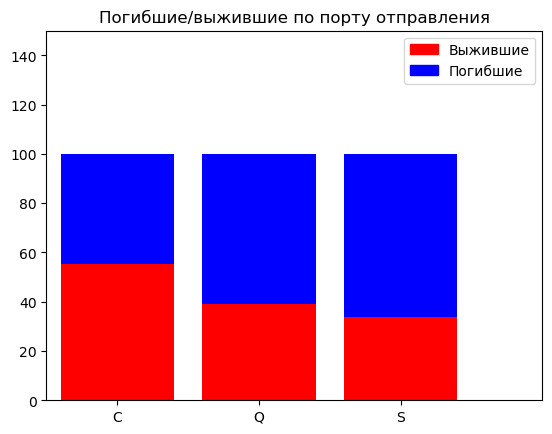

In [95]:
fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='Выжившие')
blue_patch = mpatches.Patch(color='blue', label='Погибшие')
ax.legend(handles=[red_patch,blue_patch])
series1 = np.array([55.36,38.96,33.70])
series2 = np.array([44.64,61.04,66.30])
index = np.arange(3)
plt.axis([-0.5,3,0,150])
plt.title('Погибшие/выжившие по порту отправления')
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)
plt.xticks(index,['С','Q','S'])
plt.show()

Из приведенных выше таблицы и графика можно сделать вывод, что наибольшее число погибших(66,3%) по отношению ко всем пассажирам, отплывшим из данного порта, было в Саутгемптоне, наименьшее(44,64%) - в Шербуре. 

# На следующем шаге попробуем проверить как зависила выживаемость пассажира от наличия и количества у него родственников на борту

# Для этого сперва введем новый столбец TotalRel в таблицу, который будет являться суммой столбцов SibSp(братья, сестры, супруги и т.д) и Parch(родители,дети)

In [109]:
data['TotalRel'] = data['SibSp']+data['Parch']

In [110]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total,TotalRel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [112]:
relatives = data.groupby(['TotalRel'], as_index=False).agg({'Survived' : 'sum'}).sort_values('TotalRel', ascending=False)

In [113]:
relatives

,TotalRel,Survived
8,10,0
7,7,0
6,6,4
5,5,3
4,4,3
3,3,21
2,2,59
1,1,89
0,0,163


Построим линейный график зависимости количества выживших от общего числа родственников у человека

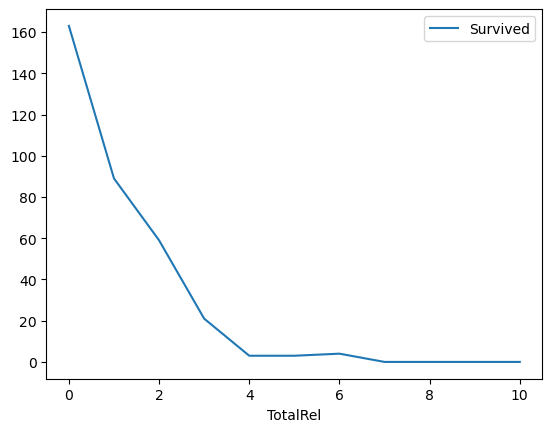

In [118]:
relatives.plot(x="TotalRel", y='Survived')
plt.show()

Из графика видно, что наибольший шанс выжить был у того, у кого на борту родственников не было. У кого родственников было 4
и более - шансы на выживание резко снизились, и свелись к 0 для тех, у кого родных на борту было более 6 человек.

# Теперь попробуем вычислить соотношение выживших среди пассажиров со счастливыми билетами(в нумерологии частливым считается билет, в котором сумма обеих частей номера равна одному и тому же числу)

In [129]:
lucky=0
count=[]
for x,y in data["Ticket"].items():
    if len(y)==6 and y.isdigit():
        num=int(y)
        sum1 = 0
        sum2 = 0
        for i in range(6):
            if i<3:
                sum2 += num // 10**i % 10
            else:
                sum1  += num // 10**i % 10 
        if sum1 == sum2:
            lucky+=1
            count.append(x)
f"Количество счастливых билетов {lucky}"

'Количество счастливых билетов 27'

In [142]:
import csv
surv=0
with open("train (2).csv") as file:
    rows = csv.reader(file)                               # создаем reader объект
    for line in rows:
        if line[1]=="1" and int(line[0]) in l:
            surv+=1
f"Выживших - {surv} человек"

'Выживших - 9 человек'

In [152]:
per = round(((surv/lucky)*100),2)

In [153]:
per

33.33

In [155]:
f"Шанс выжить пассажиру со счастливым билетом был равен {per}%"

'Шанс выжить пассажиру со счастливым билетом был равен 33.33%'

Следуя из вышесказанного можно сделать вывод, что теория о "счастливом билете" имеет место быть, так как процент выживших билетов среди всех счастливых не мал.